In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import skew
from scipy.stats import kurtosis
import datetime

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
data = pd.read_pickle('data/top15.pkl')

In [4]:
data.head()

flow  flow_shift24  flow_shift25  hour  wd_label  \
2014-01-06 00:00:00  23.530903     25.843126     34.087570     0         0   
2014-01-06 01:00:00  21.334237     19.109792     25.843126     1         0   
2014-01-06 02:00:00  18.320903     16.138681     19.109792     2         0   
2014-01-06 03:00:00  15.817570     15.366459     16.138681     3         0   
2014-01-06 04:00:00  15.727570     15.462014     15.366459     4         0   

                     drought  temp_high  temp_low  rain_1d  rain_2d  rain_1  \
2014-01-06 00:00:00      0.0        8.5       2.0    False    False     0.1   
2014-01-06 01:00:00      0.0        8.5       2.0    False    False     0.1   
2014-01-06 02:00:00      0.0        8.5       2.0    False    False     0.1   
2014-01-06 03:00:00      0.0        8.5       2.0    False    False     0.1   
2014-01-06 04:00:00      0.0        8.5       2.0    False    False     0.1   

                     rain_2  rain_7  shift_wd1  electricity  
2014-01-06 00:00:00     0.8     0.0        1.0       1191.6  
2014-01-06 01:00:00     0.8     0.0        0.0       1170.8  
2014-01-06 02:00:00     0.8     0.0        0.0       1182.3  
2014-01-06 03:00:00     0.8     0.0        0.0       1216.5  
2014-01-06 04:00:00     0.8     0.0        0.0       1326.6

In [3]:
X, y = data.iloc[:, 1:], data.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
rf = RandomForestRegressor(n_estimators=100)

In [5]:
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [6]:
pred = rf.predict(X_test)

In [7]:
score_list_abs = np.array([np.abs(pred[i] - y_test[i]) for i in range(pred.shape[0])])
score_list = np.array([pred[i] - y_test[i] for i in range(pred.shape[0])])

(array([2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 2.000e+00,
        3.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 6.000e+00, 1.200e+01,
        9.000e+00, 1.600e+01, 2.400e+01, 3.900e+01, 1.170e+02, 2.650e+02,
        6.460e+02, 1.571e+03, 2.885e+03, 1.399e+03, 5.240e+02, 1.940e+02,
        8.100e+01, 3.700e+01, 1.800e+01, 9.000e+00, 7.000e+00, 8.000e+00,
        6.000e+00, 5.000e+00, 6.000e+00, 6.000e+00, 9.000e+00, 6.000e+00,
        3.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([-72.94949391, -69.37474961, -65.80000531, -62.225261  ,
        -58.6505167 , -55.0757724 , -51.50102809, -47.92628379,
        -44.35153949, -40.77679518, -37.20205088, -33.62730658,
        -30.05256227, -26.47781797, -22.90307367, -19.32832936,
        -15.75358506, -12.17884076,  -8.60409646,  -5.02935215,
         -1.45460785,   2.12013645,   5.69488076,   9.26962506,
         12.84436936,  16.41911367,  19.99385797,  23.56860227,
         27.14334658,  30.71809088,  34.29283518,  37.

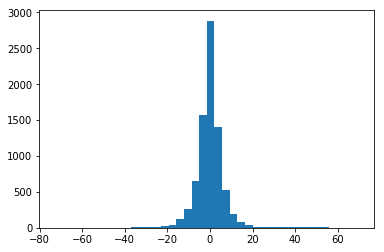

In [8]:
plt.hist(score_list, bins=40)

In [9]:
score_list.mean()

0.021626398093386207

In [10]:
score_list.std()

7.444292095613949

In [11]:
skew(score_list)

0.6149104711705046

In [12]:
kurtosis(score_list)

18.69835617594473

In [13]:
score_list_abs.mean()

4.4081460447671965

In [14]:
rf.score(X_test, y_test)

0.9178471796861857

### Next steps:

- The kurtosis is pretty high, so looking into, if there is a common pattern among the outliers might proof to be useful (Use labeled k-means to find the characteristics of the extreme outliers?).
- Better configuration of hyperparameters of RandomForest model
- Gradient boost instead of RandomForest? 


### First, GradientBoost

In [15]:
gb = GradientBoostingRegressor(learning_rate=0.45, n_estimators=600)

In [16]:
gb.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.45, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=600, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [17]:
pred = gb.predict(X_test)

In [18]:
gb.score(X_test, y_test)

0.921740577541659

GradientBoost performs slightly better than RandomForest, but not anything fantastic. Now looking for outliers:

In [19]:
X['pred_ts'] = rf.predict(X)

In [20]:
X['error'] = X.pred_ts - y

In [21]:
X['error_1'] = X.error.shift()

In [22]:
lr = LinearRegression()

In [23]:
x, y = np.array(X.error_1).reshape(-1, 1)[1:], np.array(X.error)[1:]

In [24]:
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
lr.coef_

array([0.54895634])

In [26]:
lr.score(x,y)

0.3013527034571818

In [27]:
X['error-error'] = X['error'] - X['error_1']

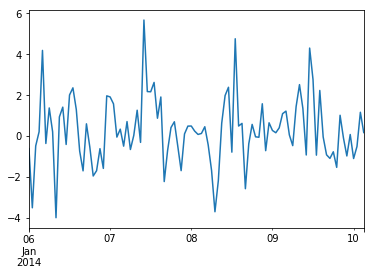

In [28]:
X['error'][0:100].plot()

In [29]:
import statsmodels.api as sm

In [30]:
mod = sm.OLS(y, x)

In [31]:
mod.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                 1.710e+04
Date:                Tue, 16 Jul 2019   Prob (F-statistic):               0.00
Time:                        15:24:51   Log-Likelihood:            -1.0553e+05
No. Observations:               39648   AIC:                         2.111e+05
Df Residuals:                   39647   BIC:                         2.111e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5490      0.004    130.772      0.000       0.541       0.557
==============================================================================
Omnibus:                    13915.291   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          4427799.766
Skew:                           0.327   Prob(JB):                         0.00
Kurtosis:                      54.767   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Clearly, the autocorrelation of the error-terms is non-zero! One thing we have to do is improve upon that.

In [32]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
from sklearn.svm import SVR

svm = SVR()
svm.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
import pickle

with open('svm.pkl', 'wb') as filehandler:
    pickle.dump(svm, filehandler)

with open('lr.pkl', 'wb') as filehandler:
    pickle.dump(lr, filehandler)

with open('gb.pkl', 'wb') as filehandler:
    pickle.dump(gb, filehandler)

with open('rf.pkl', 'wb') as filehandler:
    pickle.dump(rf, filehandler)